<a href="https://colab.research.google.com/github/Tkarthik123/Speech-Emotion-Recognition-/blob/important/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Downloading a dataset from Kaggle, specifically the Toronto Emotional Speech Set (TESS)

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle/
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!unzip -qq toronto-emotional-speech-set-tess.zip
!rm -rf toronto-emotional-speech-set-tess.zip

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 418M/428M [00:07<00:00, 17.9MB/s]
100% 428M/428M [00:08<00:00, 55.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa  #used for audio and video
import librosa.display
from IPython.display import Audio  #used to display audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

This code imports various libraries needed for analyzing and visualizing audio data. It includes pandas and numpy for data manipulation, seaborn and matplotlib for plotting, librosa for audio processing, and IPython.display for playing audio files. It also imports Keras utilities and suppresses warnings for a cleaner output.

In [ ]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
  if(len(paths)==2800):
    break
print('dataset is download')

dataset is download


 collects the file paths and corresponding emotion labels from the TESS dataset by traversing the directory and extracting labels from filenames. It stops after processing 2,800 files and confirms the dataset has been downloaded.

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_vote_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_boat_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_shout_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_kite_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_bone_neutral.wav']

In [ ]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [ ]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral


In [ ]:
df['label'].value_counts()

,count
label,
neutral,400
ps,400
sad,400
angry,400
happy,400
fear,400
disgust,400


In [ ]:
df['label_count']=df['label'].value_counts()

In [ ]:
df.drop('label_count',axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral
...,...,...
2795,/content/tess toronto emotional speech set dat...,fear
2796,/content/tess toronto emotional speech set dat...,fear
2797,/content/tess toronto emotional speech set dat...,fear
2798,/content/tess toronto emotional speech set dat...,fear


<Axes: xlabel='label', ylabel='count'>

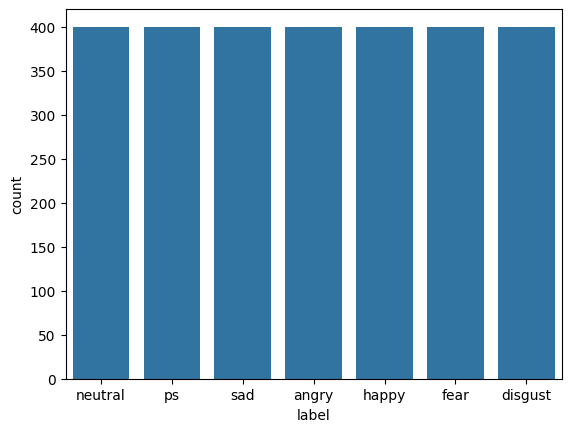

In [ ]:
sns.countplot(data=df,x='label')

generates a count plot using Seaborn, displaying the distribution of different labels (emotion categories) in the df DataFrame. It visualizes how many instances of each label are present in the dataset.

In [ ]:
def waveplot(data,sr,emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()

function waveplot(data, sr, emotion) generates a waveform plot for a given audio signal using the librosa library

In [ ]:
def spectogram(data,sr,emotion):
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion,size=20)
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()

The spectogram(data, sr, emotion) function generates a spectrogram for an audio signal using the librosa library

In [ ]:
df.drop('label_count',axis=1,inplace=True)

In [ ]:
print(df.head())
print(df['label'].unique())

                                              speech    label
0  /content/tess toronto emotional speech set dat...  neutral
1  /content/tess toronto emotional speech set dat...  neutral
2  /content/tess toronto emotional speech set dat...  neutral
3  /content/tess toronto emotional speech set dat...  neutral
4  /content/tess toronto emotional speech set dat...  neutral
['neutral' 'ps' 'sad' 'angry' 'happy' 'fear' 'disgust']


In [ ]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_vote_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_boat_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_shout_neutral.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_time_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_kill_fear.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_vine_fear.wav'],
      dtype=object)

Below code loads an audio file labeled "angry," plots its waveform and spectrogram, and plays the audio.

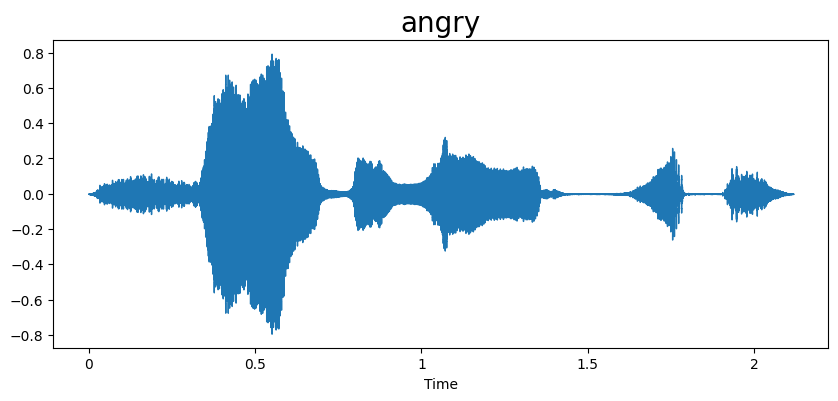

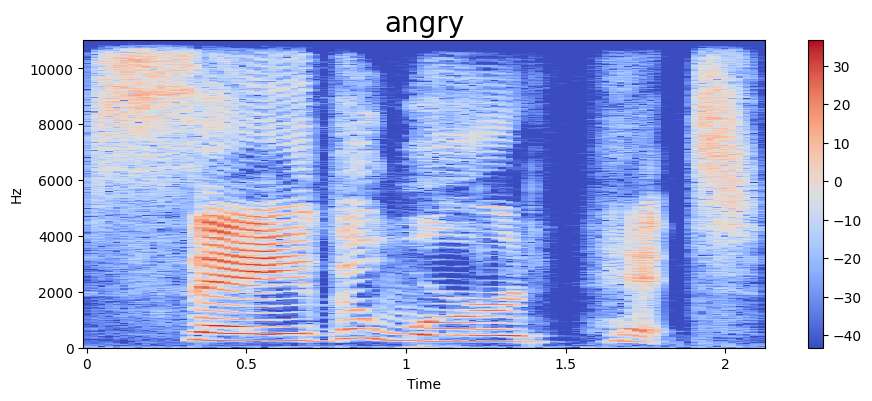

In [ ]:
emotion = "angry"
path = np.array(df['speech'][df['label'] == emotion])[1]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

Below code loads an audio file labeled "neutral," plots its waveform and spectrogram, and plays the audio.

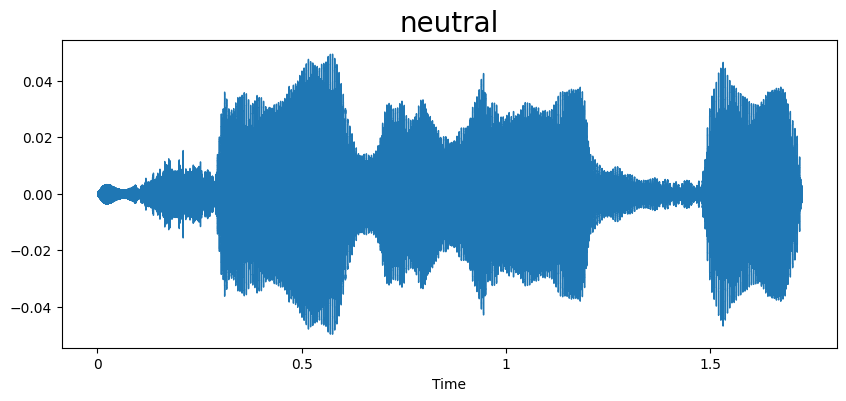

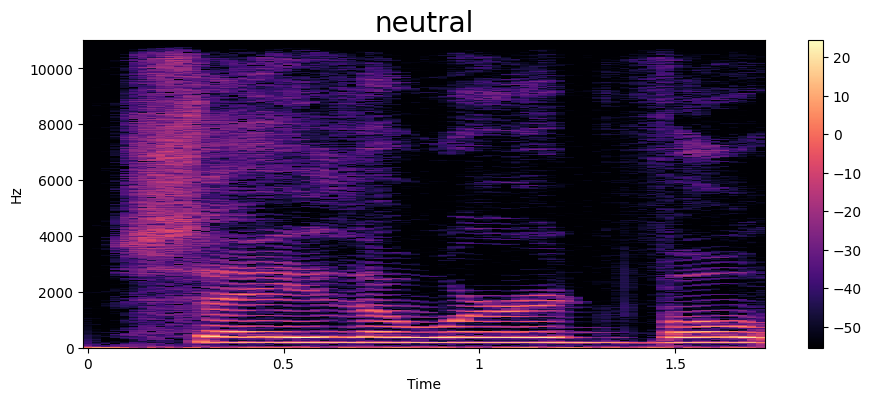

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

Below code loads an audio file labeled "sad," plots its waveform and spectrogram, and plays the audio.

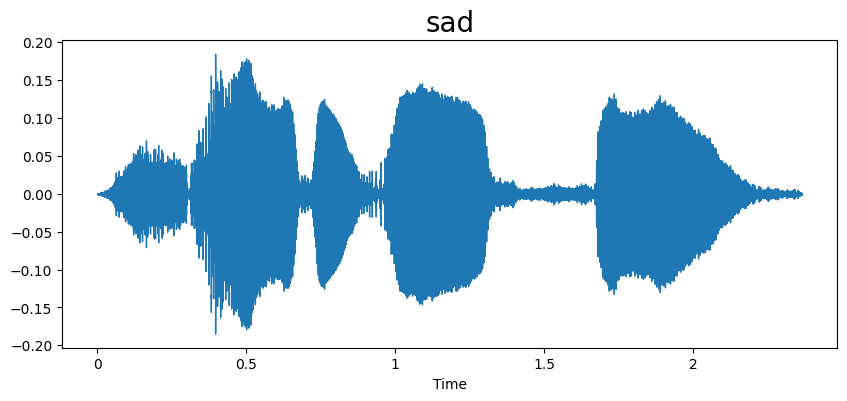

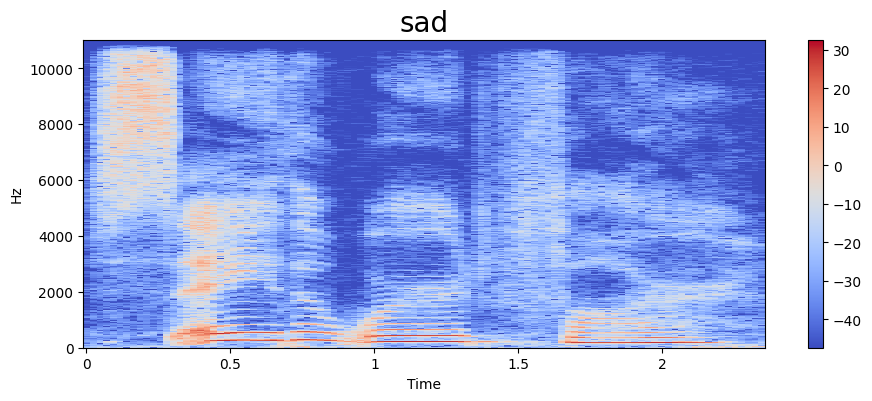

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

Below code loads an audio file labeled "ps," plots its waveform and spectrogram, and plays the audio.

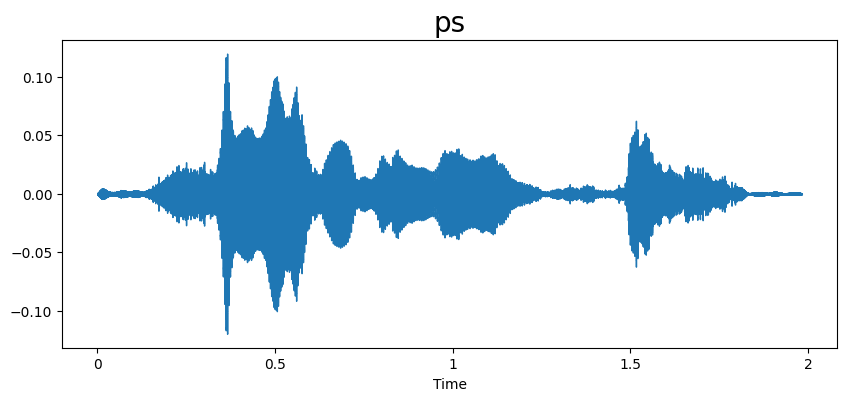

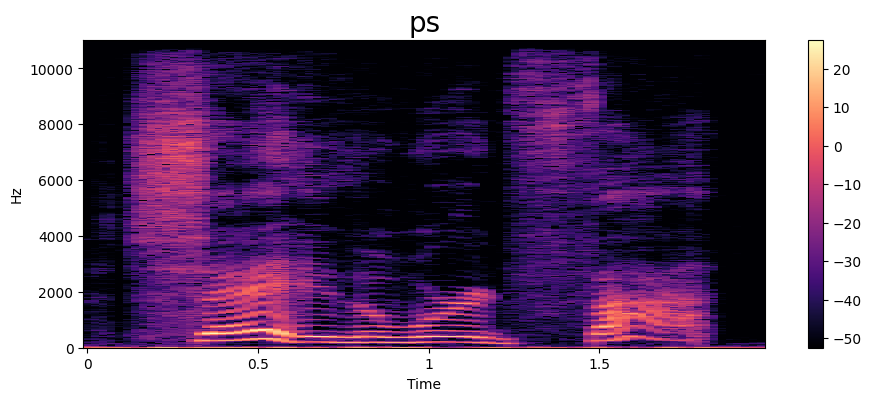

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

Below code loads an audio file labeled "happy," plots its waveform and spectrogram, and plays the audio.

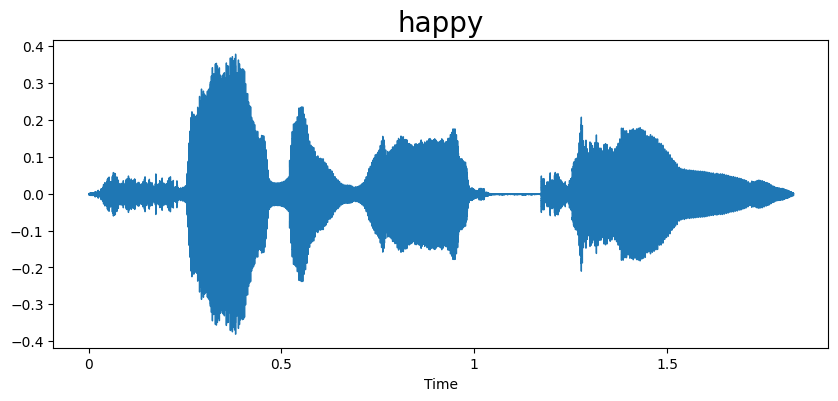

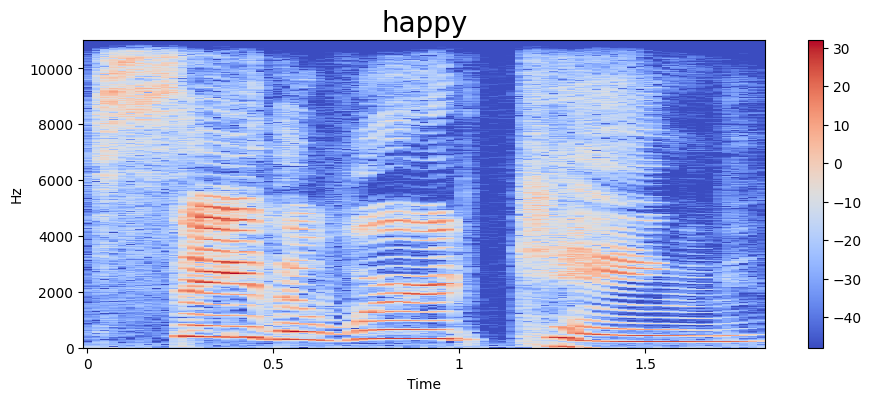

In [ ]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

The extract_mfcc(filename) function extracts and returns the mean Mel-Frequency Cepstral Coefficients (MFCCs) from an audio file, using a 3-second duration with a 0.5-second offset.

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-5.4714282e+02,  1.1375922e+02,  3.5436787e+01, -5.0645733e+00,
        1.2502842e+01,  8.8926659e+00, -2.1625059e+00, -6.8215075e+00,
       -1.6317657e+01, -3.9032538e+00, -1.1600011e+01, -2.9553862e+00,
       -1.0308375e+01,  7.9907513e-01,  7.5383334e+00,  1.0993689e+00,
       -7.9385507e-01,  7.1820908e+00, -2.6681559e+00, -1.3282095e+00,
       -1.9314733e+00,  3.1614476e-01, -3.2305813e+00, -1.7383832e+00,
       -1.1845677e+01, -6.7825902e-01, -1.3334084e+01,  1.9638649e+00,
       -3.3065240e+00, -4.8334970e+00, -8.0299635e+00, -7.2876577e+00,
       -9.0410223e+00, -1.4933874e-01,  2.2662422e+01,  3.4935192e+01,
        4.5936520e+01,  4.2933243e+01,  2.6993286e+01,  1.0572157e+01],
      dtype=float32)

In [ ]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [ ]:
x_mfcc

,speech
0,"[-547.1428, 113.75922, 35.436787, -5.0645733, ..."
1,"[-533.6521, 112.14889, 36.682503, 3.1267436, 6..."
2,"[-481.6557, 80.43489, 14.06739, 3.7248943, 8.2..."
3,"[-505.0079, 97.62334, 13.907459, 3.4893417, 15..."
4,"[-553.5752, 106.701195, 35.995552, 8.247646, 8..."
...,...
2795,"[-298.43918, 55.540203, -15.294176, -3.9173093..."
2796,"[-254.47058, 57.12825, -39.79231, 6.764894, -6..."
2797,"[-333.81586, 40.91223, -19.692923, 13.061709, ..."
2798,"[-321.49887, 47.913506, -19.302774, 13.760705,..."


In [ ]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(2800, 40)

In [ ]:
#input split
x=np.expand_dims(x,-1)
x.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])
y

<2800x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2800 stored elements in Compressed Sparse Row format>

In [ ]:
y=y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

The model is a Sequential neural network with an LSTM layer followed by several Dense layers and Dropout layers, designed for a classification task with 7 output classes. It uses categorical crossentropy loss and the Adam optimizer, and its architecture is summarized using model.summary().

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)


The model.fit method trains the model using x_train and y_train, with validation on

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.2502 - loss: 1.8431 - val_accuracy: 0.5536 - val_loss: 0.9952
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.5540 - loss: 1.1289 - val_accuracy: 0.7321 - val_loss: 0.7426
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.6674 - loss: 0.7804 - val_accuracy: 0.8482 - val_loss: 0.4306
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.7822 - loss: 0.6589 - val_accuracy: 0.8839 - val_loss: 0.3183
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.8732 - loss: 0.3826 - val_accuracy: 0.9393 - val_loss: 0.1974
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.9355 - loss: 0.2469 - val_accuracy: 0.9393 - val_loss: 0.1906
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - accuracy: 0.9354 - loss: 0.2205 - val_accuracy: 0.9661 - val_loss: 0.1375
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.9216 - loss: 0.2816 - val_accuracy

In [ ]:
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_val_classes=np.argmax(y_val,axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
conf_matrix=confusion_matrix(y_val_classes,y_pred_classes)
print('confusion matrix')
print(conf_matrix)

confusion matrix
[[65  0  0  2  0  0  0]
 [ 0 81  0  0  0  2  0]
 [ 0  0 70  0  0  0  0]
 [ 1  1  0 76  0  1  0]
 [ 0  0  0  0 86  0  0]
 [ 0  0  0  0  0 76  0]
 [ 0  1  0  0  0  0 98]]


In [ ]:
target_names=['angry','disgust','fear','happy','neutral','ps','sad']
print("Classification Report")
print(classification_report(y_val_classes,y_pred_classes,target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.98      0.97      0.98        67
     disgust       0.98      0.98      0.98        83
        fear       1.00      1.00      1.00        70
       happy       0.97      0.96      0.97        79
     neutral       1.00      1.00      1.00        86
          ps       0.96      1.00      0.98        76
         sad       1.00      0.99      0.99        99

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



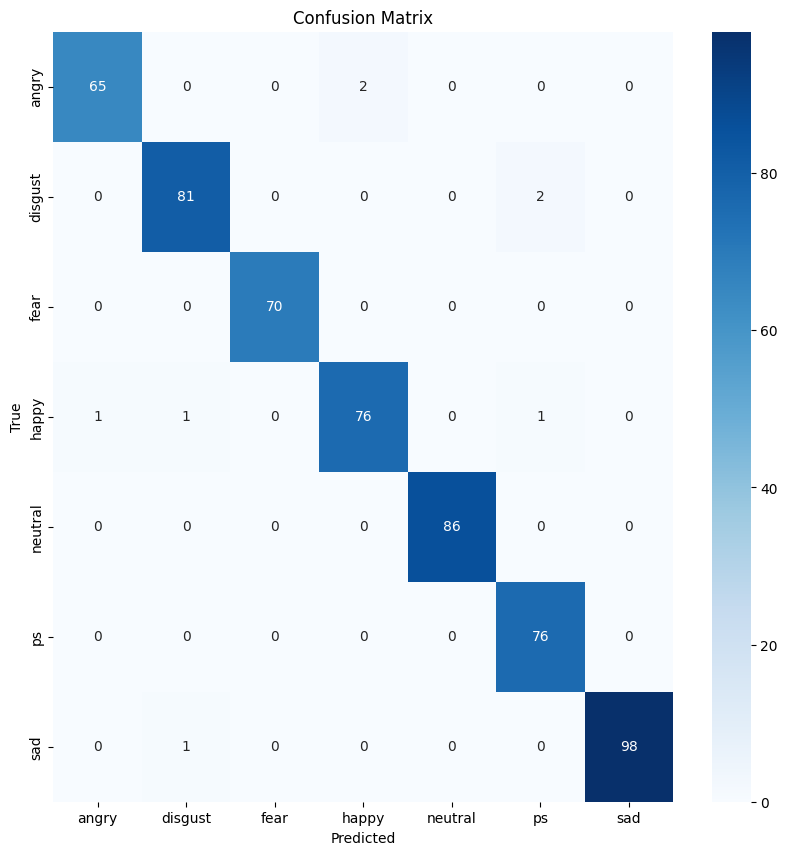

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()